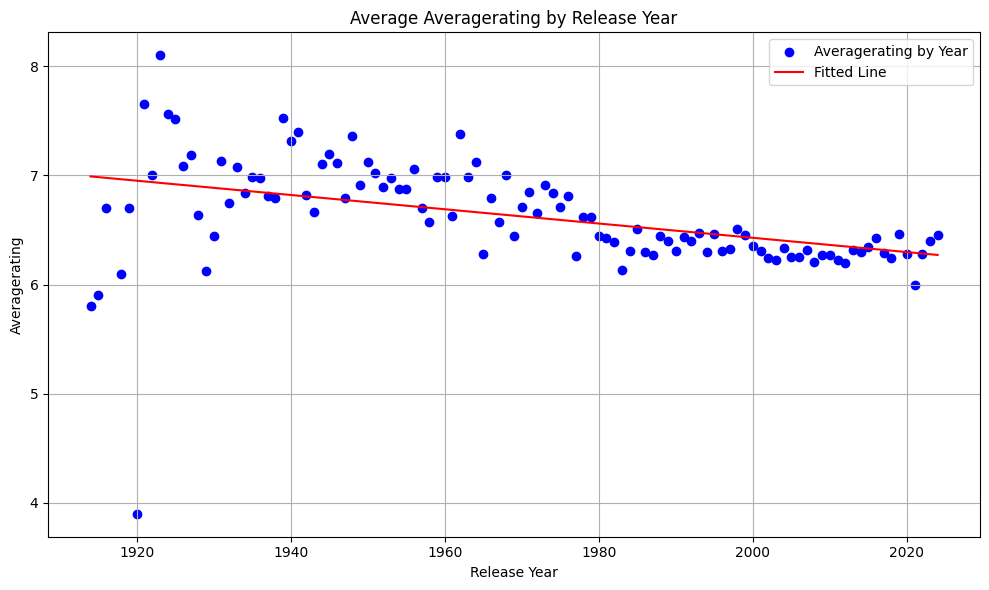

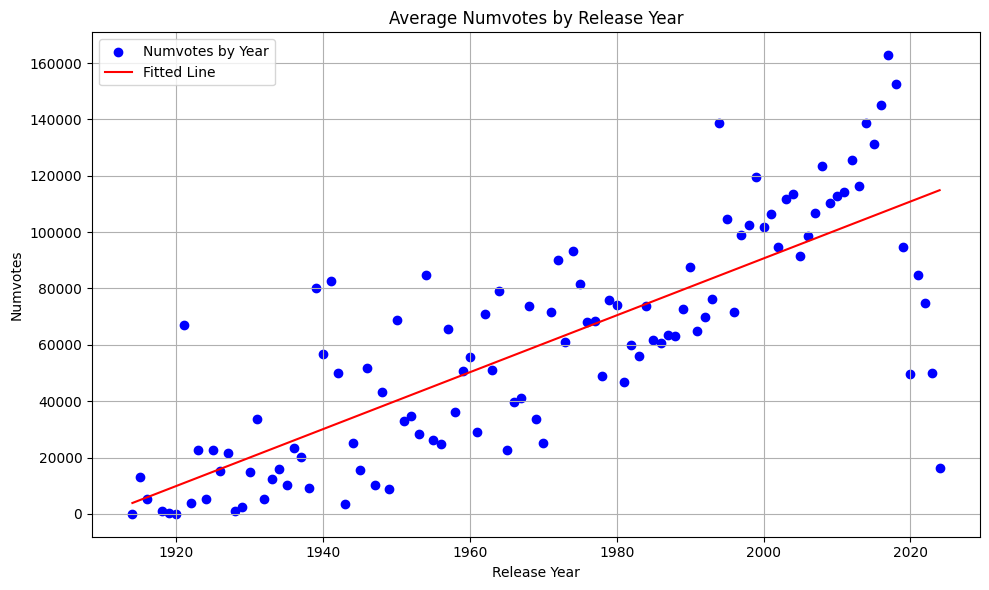

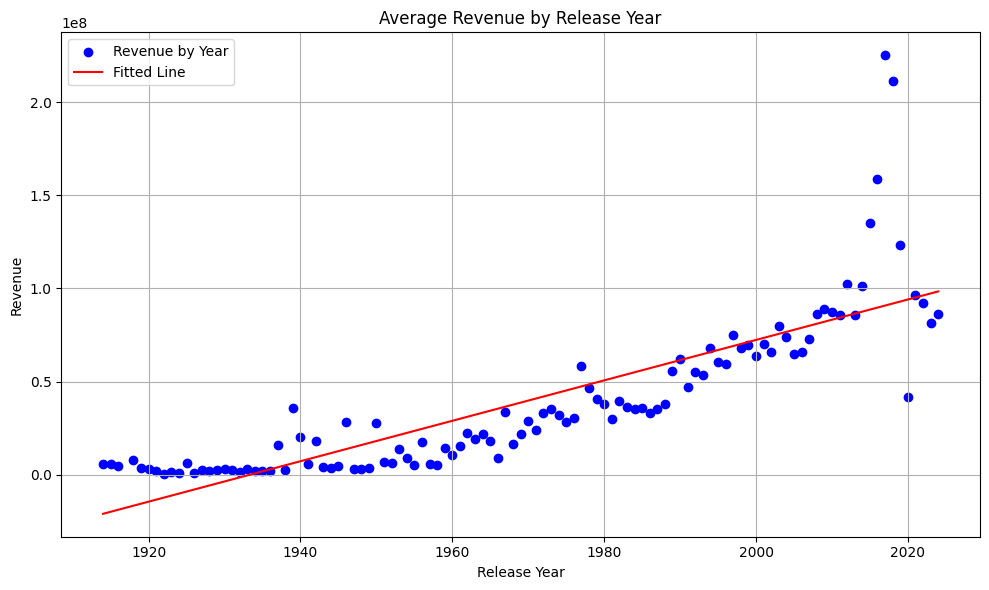

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load the dataset
df = pd.read_csv('imdb_budget_revenue_data.csv')

# Convert releaseYear to numeric for plotting
df['releaseYear'] = pd.to_numeric(df['releaseYear'], errors='coerce')

# Drop rows with missing releaseYear values
df.dropna(subset=['releaseYear'], inplace=True)

# Function to plot average metric by release year
def plot_metric(metric):
    if metric not in df.columns:
        print("Invalid metric. Please enter one of the following: averageRating, numVotes, Revenue")
        return
    
    # Compute average metric for each release year
    avg_metric_year = df.groupby('releaseYear')[metric].mean()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_metric_year.index, avg_metric_year.values, color='blue', label=metric.capitalize() + ' by Year')

    # Fit a trend line
    slope, intercept, r_value, p_value, std_err = linregress(avg_metric_year.index, avg_metric_year.values)
    plt.plot(avg_metric_year.index, intercept + slope*avg_metric_year.index, color='red', label='Fitted Line')

    # Add labels and title
    plt.xlabel('Release Year')
    plt.ylabel(metric.capitalize())
    plt.title('Average ' + metric.capitalize() + ' by Release Year')

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot averageRating by release year
plot_metric('averageRating')

# Plot numVotes by release year
plot_metric('numVotes')

# Plot Revenue by release year
plot_metric('Revenue')



In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from ipywidgets import interact, Dropdown

# Load the dataset
df = pd.read_csv('imdb_budget_revenue_data.csv')

# Convert releaseYear to numeric for plotting
df['releaseYear'] = pd.to_numeric(df['releaseYear'], errors='coerce')

# Drop rows with missing releaseYear values
df.dropna(subset=['releaseYear'], inplace=True)

# Function to plot average metric by release year
def plot_metric(metric):
    if metric not in df.columns:
        print("Invalid metric. Please enter one of the following: averageRating, numVotes, Revenue")
        return
    
    # Compute average metric for each release year
    avg_metric_year = df.groupby('releaseYear')[metric].mean()
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.scatter(avg_metric_year.index, avg_metric_year.values, color='blue', label=metric.capitalize() + ' by Year')

    # Fit a trend line
    slope, intercept, r_value, p_value, std_err = linregress(avg_metric_year.index, avg_metric_year.values)
    plt.plot(avg_metric_year.index, intercept + slope*avg_metric_year.index, color='red', label='Fitted Line')

    # Add labels and title
    plt.xlabel('Release Year')
    plt.ylabel(metric.capitalize())
    plt.title('Average ' + metric.capitalize() + ' by Release Year')

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create dropdown menu for selecting metric
metrics_dropdown = Dropdown(options=['averageRating', 'numVotes', 'Revenue'], description='Metric:', disabled=False)

# Define interactive function
def interactive_plot(metric):
    plot_metric(metric)

# Display the dropdown menu and the plot
interact(interactive_plot, metric=metrics_dropdown)


interactive(children=(Dropdown(description='Metric:', options=('averageRating', 'numVotes', 'Revenue'), value=…

<function __main__.interactive_plot(metric)>